# Exploratory and Regression Analysis of Worldwide Governance Indicators (WGI) and Human Development Index (HDI)

#### CSSM550: DS4SDGs (Data Science for Sustainable Development Goals) - Capstone Project
#### Melih Can Yardı, M.A. in Computational Social Sciences at Koç University

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Worldwide Governance Indicators (WGI)
- Six dimensions of governance (Source: https://info.worldbank.org/governance/wgi/):
    - **VoiceandAccountability**: Voice and Accountability
    - **Political StabilityNoViolence**: Political Stability and Absence of Violence/Terrorism
    - **GovernmentEffectiveness**: Government Effectiveness
    - **RegulatoryQuality**: Regulatory Quality
    - **RuleofLaw**: Rule of Law
    - **ControlofCorruption**: Control of Corruption

### Read and Clean Dataset

In [2]:
indicator_names = {"VoiceandAccountability": "Voice and Accountability",
                   "Political StabilityNoViolence": "Political Stability and Absence of Violence/Terrorism",
                   "GovernmentEffectiveness": "Government Effectiveness",
                   "RegulatoryQuality": "Regulatory Quality",
                   "RuleofLaw": "Rule of Law",
                   "ControlofCorruption": "Control of Corruption"}

In [3]:
# Read sheet names from Excel File (skip first sheet, i.e., "Introduction")
indicators = pd.ExcelFile("data/wgidataset.xlsx").sheet_names[1:]
print("Governance Indicators:")
for indicator in indicators:
    print(f"- {indicator_names[indicator]}")

Governance Indicators:
- Voice and Accountability
- Political Stability and Absence of Violence/Terrorism
- Government Effectiveness
- Regulatory Quality
- Rule of Law
- Control of Corruption


In [4]:
governance = {}

for indicator in indicators:
    df_temp = pd.read_excel("data/wgidataset.xlsx", sheet_name=indicator, skiprows=13)
    df_temp = df_temp.rename({"Unnamed: 0": "Country/Territory", "Unnamed: 1":"Code"}, axis=1)
    df_temp.columns = [str(col) for col in df_temp.columns]
    df_temp = df_temp.loc[1:, [col for col in df_temp.columns if "." not in col]].reset_index(drop=True)
    governance[indicator] = df_temp

### Exploratory Analysis

In [5]:
for indicator in indicators:
    print(f"\n- {indicator_names[indicator]}:")
    display(governance[indicator].head())


- Voice and Accountability:


Country/Territory Code      1996      1998      2000      2002      2003  \
0             Aruba  ABW       NaN       NaN       NaN       NaN       NaN   
1           Andorra  ADO  1.563217  1.528759  1.535655  1.437128  1.422262   
2       Afghanistan  AFG  -1.90854 -2.039301 -2.031417 -1.433421 -1.177571   
3            Angola  AGO -1.578164 -1.411879 -1.458065 -1.238779 -1.272615   
4          Anguilla  AIA       NaN       NaN       NaN       NaN       NaN   

       2004      2005      2006  ...      2012      2013      2014      2015  \
0  0.737521   1.15323  1.017273  ...   1.28465  1.278059   1.27685  1.273961   
1  1.563077  1.528182  1.329979  ...  1.433838  1.406642  1.165965  1.194495   
2 -1.203034  -1.12543 -1.110294  ...  -1.26743 -1.240068  -1.13544 -1.117557   
3  -1.28548 -1.234719 -1.252088  ... -1.076247 -1.113844  -1.14523 -1.177087   
4  0.854418  0.903781  1.017273  ...  1.025672  1.004767       NaN       NaN   

       2016      2017      2018      2019      2020      2021  
0  1.279364  1.295546  1.271602  1.264367  1.286165  1.028604  
1  1.176597  1.161653  1.036903  1.110087  1.089938  1.043449  
2 -1.037788 -0.990814   -1.0116 -1.006747 -1.077736 -1.570883  
3 -1.140293 -1.098075  -0.90631 -0.783404 -0.802131 -0.840916  
4       NaN       NaN       NaN       NaN       NaN       NaN  

[5 rows x 25 columns]


- Political Stability and Absence of Violence/Terrorism:


Country/Territory Code      1996      1998      2000      2002      2003  \
0             Aruba  ABW       NaN       NaN       NaN       NaN       NaN   
1           Andorra  ADO  1.169522  1.182875  1.166981  1.282767  1.465131   
2       Afghanistan  AFG  -2.41731 -2.427355 -2.438969 -2.035034 -2.198372   
3            Angola  AGO -2.061917 -2.318058 -2.038174  -1.57618 -1.007386   
4          Anguilla  AIA       NaN       NaN       NaN       NaN       NaN   

       2004      2005      2006  ...      2012      2013      2014      2015  \
0  0.993218  1.376416  1.303461  ...  1.263882  1.312226  1.164568  1.230921   
1  1.402106  1.384927  1.349654  ...  1.290351  1.283926  1.286593  1.391288   
2 -2.295682  -2.06751 -2.219135  ... -2.418561 -2.519349 -2.411068 -2.571222   
3 -1.063121 -0.885178 -0.539453  ... -0.389323 -0.391233 -0.333232 -0.500898   
4  0.788185  1.189666    1.1048  ...   1.47692   1.53398  1.164255  1.249272   

       2016      2017      2018      2019      2020      2021  
0  1.284199  1.335038  1.356553  1.349796  1.390273  1.474335  
1  1.413419  1.421869  1.417627  1.602202  1.616035  1.631809  
2 -2.671054 -2.801084 -2.763864 -2.655531  -2.70503 -2.529855  
3 -0.315899 -0.380449 -0.335692 -0.358525 -0.514615 -0.710836  
4  1.315344  1.389452  1.287406  1.355694  1.545165  1.585498  

[5 rows x 25 columns]


- Government Effectiveness:


Country/Territory Code      1996      1998      2000      2002      2003  \
0             Aruba  ABW       NaN       NaN       NaN       NaN       NaN   
1           Andorra  ADO  1.414038  1.403356  1.380487  1.367723  1.348457   
2       Afghanistan  AFG -2.175167 -2.102292 -2.173946 -1.587687  -1.12742   
3            Angola  AGO  -0.85994 -1.055107 -1.075034 -1.132157 -1.126209   
4          Anguilla  AIA       NaN       NaN       NaN       NaN       NaN   

       2004      2005      2006  ...      2012      2013      2014      2015  \
0  1.280985  1.287202  1.279471  ...  1.247286  1.221145  0.887694  0.880507   
1  1.503341  1.287202  1.538034  ...  1.523035   1.53252  1.712236  1.782486   
2 -0.909889 -1.217238 -1.465511  ... -1.376419 -1.400745 -1.362318 -1.351808   
3 -1.334659 -1.106319 -1.381511  ...  -0.99093  -1.24663 -1.055084 -0.893183   
4  1.058628  1.552871  1.538034  ...  1.523035   1.53252  0.948115  1.004043   

       2016      2017      2018      2019      2020      2021  
0  0.888866  0.913862  1.051761  1.024025  1.121368  1.132214  
1  1.853124   1.93148  1.936132  1.901038  1.816116   1.81625  
2 -1.254182 -1.359922 -1.479299 -1.495627 -1.585145  -1.63437  
3 -0.936142 -0.919977 -0.978715  -1.08401 -1.203528 -1.059369  
4  1.323129  0.832175  0.824066  0.810355  0.971156  0.976895  

[5 rows x 25 columns]


- Regulatory Quality:


Country/Territory Code      1996      1998      2000      2002      2003  \
0             Aruba  ABW       NaN       NaN       NaN       NaN       NaN   
1           Andorra  ADO   1.26644  1.245862  1.223144  1.422463  1.414684   
2       Afghanistan  AFG  -2.09033 -2.062872 -2.080253 -1.811546 -1.463108   
3            Angola  AGO -1.415345 -1.445262 -1.507048 -1.294135 -1.187467   
4          Anguilla  AIA       NaN       NaN       NaN       NaN       NaN   

       2004      2005      2006  ...      2012      2013      2014      2015  \
0  0.762954  0.864074  0.855287  ...  1.402131   1.42088  1.245361    1.3669   
1  1.414261  1.359161  1.349776  ...   1.56186  1.558741  0.880748  0.908654   
2 -1.511549  -1.64344 -1.689469  ...  -1.19258  -1.19309 -1.124134 -1.006208   
3 -1.226714 -1.240036 -1.156216  ... -0.990438  -1.04167 -0.860683 -0.842345   
4  0.907689  1.111617  1.349776  ...  1.321213  1.319419  0.880748  0.908654   

       2016      2017      2018      2019      2020      2021  
0   1.34424  1.189792  0.854681  0.855567  0.925701  0.946877  
1   0.86786  1.205159  1.191896  1.226534  1.343301  1.362525  
2 -1.336582 -1.355373  -1.14759 -1.123046 -1.402761 -1.338022  
3 -0.957893 -1.026228  -0.78579 -0.820472 -0.841778 -0.662632  
4   0.86786  0.839894  0.821928  0.844434  0.942807  0.955577  

[5 rows x 25 columns]


- Rule of Law:


Country/Territory Code      1996      1998      2000      2002      2003  \
0             Aruba  ABW       NaN       NaN       NaN       NaN       NaN   
1           Andorra  ADO  1.158363  1.177254  1.286165  1.223841  1.055983   
2       Afghanistan  AFG -1.788075 -1.734887 -1.780661 -1.673473 -1.558294   
3            Angola  AGO -1.630469 -1.527339 -1.601502 -1.633344 -1.482856   
4          Anguilla  AIA       NaN       NaN       NaN       NaN       NaN   

       2004      2005      2006  ...      2012      2013      2014      2015  \
0  0.915527  0.847438  0.810431  ...  1.309788  1.292505   1.03631   1.25577   
1  1.194324  0.966194  0.855686  ...  1.401188  1.401491  1.638325  1.570037   
2 -1.693925 -1.662966 -1.879005  ... -1.651893 -1.609112 -1.437045 -1.498492   
3 -1.520916 -1.464795 -1.311273  ... -1.304777 -1.290796  -1.07479 -1.013801   
4  1.143318  1.633369  1.586802  ...   1.35794  1.360453  0.019608 -0.041642   

       2016      2017      2018      2019      2020      2021  
0  1.253775  1.325272   1.28951   1.25626  1.298945  1.279572  
1  1.568934  1.595152  1.598812  1.572287  1.688275  1.715106  
2 -1.512381 -1.577596 -1.681358 -1.727894 -1.819898 -1.871436  
3 -0.991232 -1.026077 -0.986208 -0.993775 -0.913334 -0.952416  
4 -0.088209  -0.10743 -0.102875  0.351113  0.430284  0.440415  

[5 rows x 25 columns]


- Control of Corruption:


Country/Territory Code      1996      1998      2000      2002      2003  \
0             Aruba  ABW       NaN       NaN       NaN       NaN       NaN   
1           Andorra  ADO  1.318143  1.334759  1.313404  1.310744   1.33279   
2       Afghanistan  AFG -1.291705 -1.176012 -1.271724 -1.251137  -1.34418   
3            Angola  AGO -1.167702 -1.180451 -1.197514 -1.155493 -1.335463   
4          Anguilla  AIA       NaN       NaN       NaN       NaN       NaN   

       2004      2005      2006  ...      2012      2013      2014      2015  \
0  1.165965  1.269663  1.251313  ...  1.095236  1.119407  1.014232  1.294156   
1   1.11915  1.269663  1.251313  ...  1.260531  1.253549  1.220709   1.21544   
2 -1.350647 -1.447252 -1.446292  ... -1.430373 -1.445908 -1.364743 -1.348587   
3 -1.377569 -1.323182 -1.241038  ... -1.302401 -1.336875 -1.457798  -1.40927   
4   0.83826  1.269663  1.251313  ...  1.260531  1.253549  1.220709   1.21544   

       2016      2017      2018      2019      2020      2021  
0  1.280407  1.287308  1.247948  1.213882  1.232362  0.834079  
1  1.223311  1.237865  1.234533  1.231043  1.311401  1.325617  
2 -1.534049 -1.521726 -1.489772  -1.40771 -1.480538 -1.142377  
3 -1.467879 -1.428053 -1.180501 -1.078114 -0.953371 -0.655346  
4  1.223311  1.237865  1.234533  1.231043  0.675268  0.680943  

[5 rows x 25 columns]

In [6]:
governance_df = pd.DataFrame()

for indicator in indicators:
    df = governance[indicator]
    for i in range(len(df)):
        country = df.loc[i, "Country/Territory"]
        code = df.loc[i, "Code"]

        df_temp = df[df["Code"] == code].T.reset_index().iloc[2:,:].rename({"index":"year", i:"gov_estimate"}, axis=1).reset_index(drop=True)
        df_temp["gov_estimate"] = df_temp["gov_estimate"].interpolate("linear")
        df_temp["country"] = country
        df_temp["code"] = code
        df_temp["gov_indicator"] = indicator

        governance_df = pd.concat([governance_df, df_temp]).reset_index(drop=True)

In [7]:
for indicator in indicators:
    df_temp = governance_df[governance_df["gov_indicator"] == indicator].reset_index(drop=True)
    print(f"- {indicator_names[indicator]} (Highest Rank):")
    display(df_temp.groupby("country")["gov_estimate"].sum().sort_values(ascending=False).dropna().reset_index().head(10))
    print(f"- {indicator_names[indicator]} (Lowest Rank):")
    display(df_temp.groupby("country")["gov_estimate"].sum().sort_values(ascending=False).dropna().reset_index().tail(10))

- Voice and Accountability (Highest Rank):


country gov_estimate
0       Norway    37.379086
1      Denmark    36.097529
2       Sweden    36.022641
3  New Zealand    36.016786
4      Finland    35.780659
5   Luxembourg    35.580492
6  Netherlands    35.337597
7  Switzerland    35.316821
8       Canada    33.762837
9      Iceland    32.976808

- Voice and Accountability (Lowest Rank):


country gov_estimate
204               Myanmar   -38.645097
205          Saudi Arabia   -39.101445
206                 Sudan   -39.382363
207  Syrian Arab Republic   -40.555907
208     Equatorial Guinea    -41.52135
209            Uzbekistan   -42.848521
210               Somalia   -43.286253
211               Eritrea   -46.257424
212          Turkmenistan   -47.019634
213      Korea, Dem. Rep.   -50.096854

- Political Stability and Absence of Violence/Terrorism (Highest Rank):


country gov_estimate
0  Liechtenstein    32.868655
1     Luxembourg    32.101737
2        Iceland    31.526798
3    New Zealand    31.425531
4        Andorra    31.317473
5        Finland    30.909165
6    Switzerland     30.38552
7         Norway    29.358635
8      Singapore    29.169654
9          Malta     28.44524

- Political Stability and Absence of Violence/Terrorism (Lowest Rank):


country gov_estimate
204        West Bank and Gaza   -40.710162
205                   Nigeria     -41.5892
206  Central African Republic   -41.933369
207                  Pakistan   -48.078748
208               Yemen, Rep.   -48.461686
209          Congo, Dem. Rep.   -49.554423
210                     Sudan   -49.569295
211                      Iraq   -52.572527
212               Afghanistan   -57.043352
213                   Somalia   -60.951805

- Government Effectiveness (Highest Rank):


country gov_estimate
0    Singapore     49.52895
1      Finland    47.237054
2      Denmark    46.116368
3  Switzerland    44.993686
4       Norway    43.327204
5  Netherlands    42.628452
6       Sweden    42.607095
7       Canada    41.098646
8   Luxembourg    40.327705
9  New Zealand    39.746713

- Government Effectiveness (Lowest Rank):


country gov_estimate
204                   Liberia   -31.732597
205                   Eritrea   -31.940468
206                      Iraq   -32.638493
207               Afghanistan   -34.504729
208  Central African Republic   -35.305865
209                   Comoros      -36.414
210          Congo, Dem. Rep.   -37.767358
211                     Haiti   -38.058937
212          Korea, Dem. Rep.   -40.558314
213                   Somalia   -48.389471

- Regulatory Quality (Highest Rank):


country gov_estimate
0             Singapore     45.77643
1  Hong Kong SAR, China    43.917837
2           New Zealand    42.150793
3           Netherlands    41.647237
4               Finland    40.831149
5               Denmark    40.308634
6            Luxembourg    39.855627
7        United Kingdom    39.831927
8             Australia    39.590148
9           Switzerland    38.470845

- Regulatory Quality (Lowest Rank):


country gov_estimate
204        Afghanistan   -34.605351
205   Congo, Dem. Rep.   -34.844239
206  Equatorial Guinea   -35.457048
207            Myanmar   -38.231344
208           Zimbabwe   -39.146338
209              Libya   -39.586434
210            Eritrea   -43.655753
211       Turkmenistan   -44.619597
212            Somalia   -50.684113
213   Korea, Dem. Rep.   -52.791779

- Rule of Law (Highest Rank):


country gov_estimate
0      Finland    45.642249
1       Norway    44.631859
2      Denmark    43.935687
3       Sweden    43.093976
4  New Zealand    43.037577
5  Switzerland    42.902149
6      Austria     42.38777
7   Luxembourg     41.36946
8  Netherlands      41.0997
9    Australia    40.231743

- Rule of Law (Lowest Rank):


country gov_estimate
204          Korea, Dem. Rep.   -32.170303
205                   Myanmar   -32.186644
206              Turkmenistan   -33.388171
207                  Zimbabwe   -34.440359
208  Central African Republic   -34.678075
209             Venezuela, RB   -38.042038
210                      Iraq   -38.145925
211          Congo, Dem. Rep.   -38.949793
212               Afghanistan   -39.582934
213                   Somalia   -52.817121

- Control of Corruption (Highest Rank):


country gov_estimate
0      Denmark    53.278645
1      Finland    52.095701
2  New Zealand    51.839147
3       Sweden    49.956196
4    Singapore    49.518155
5       Norway    48.484722
6  Switzerland    47.204889
7  Netherlands    46.425488
8      Iceland    45.686535
9   Luxembourg        45.48

- Control of Corruption (Lowest Rank):


country gov_estimate
204              Haiti   -29.607123
205       Turkmenistan   -29.651308
206              Sudan   -30.320365
207  Equatorial Guinea   -31.444991
208               Iraq   -31.876805
209   Korea, Dem. Rep.   -31.885249
210               Chad   -32.176049
211        Afghanistan    -32.82824
212   Congo, Dem. Rep.   -33.123745
213            Somalia   -36.883094

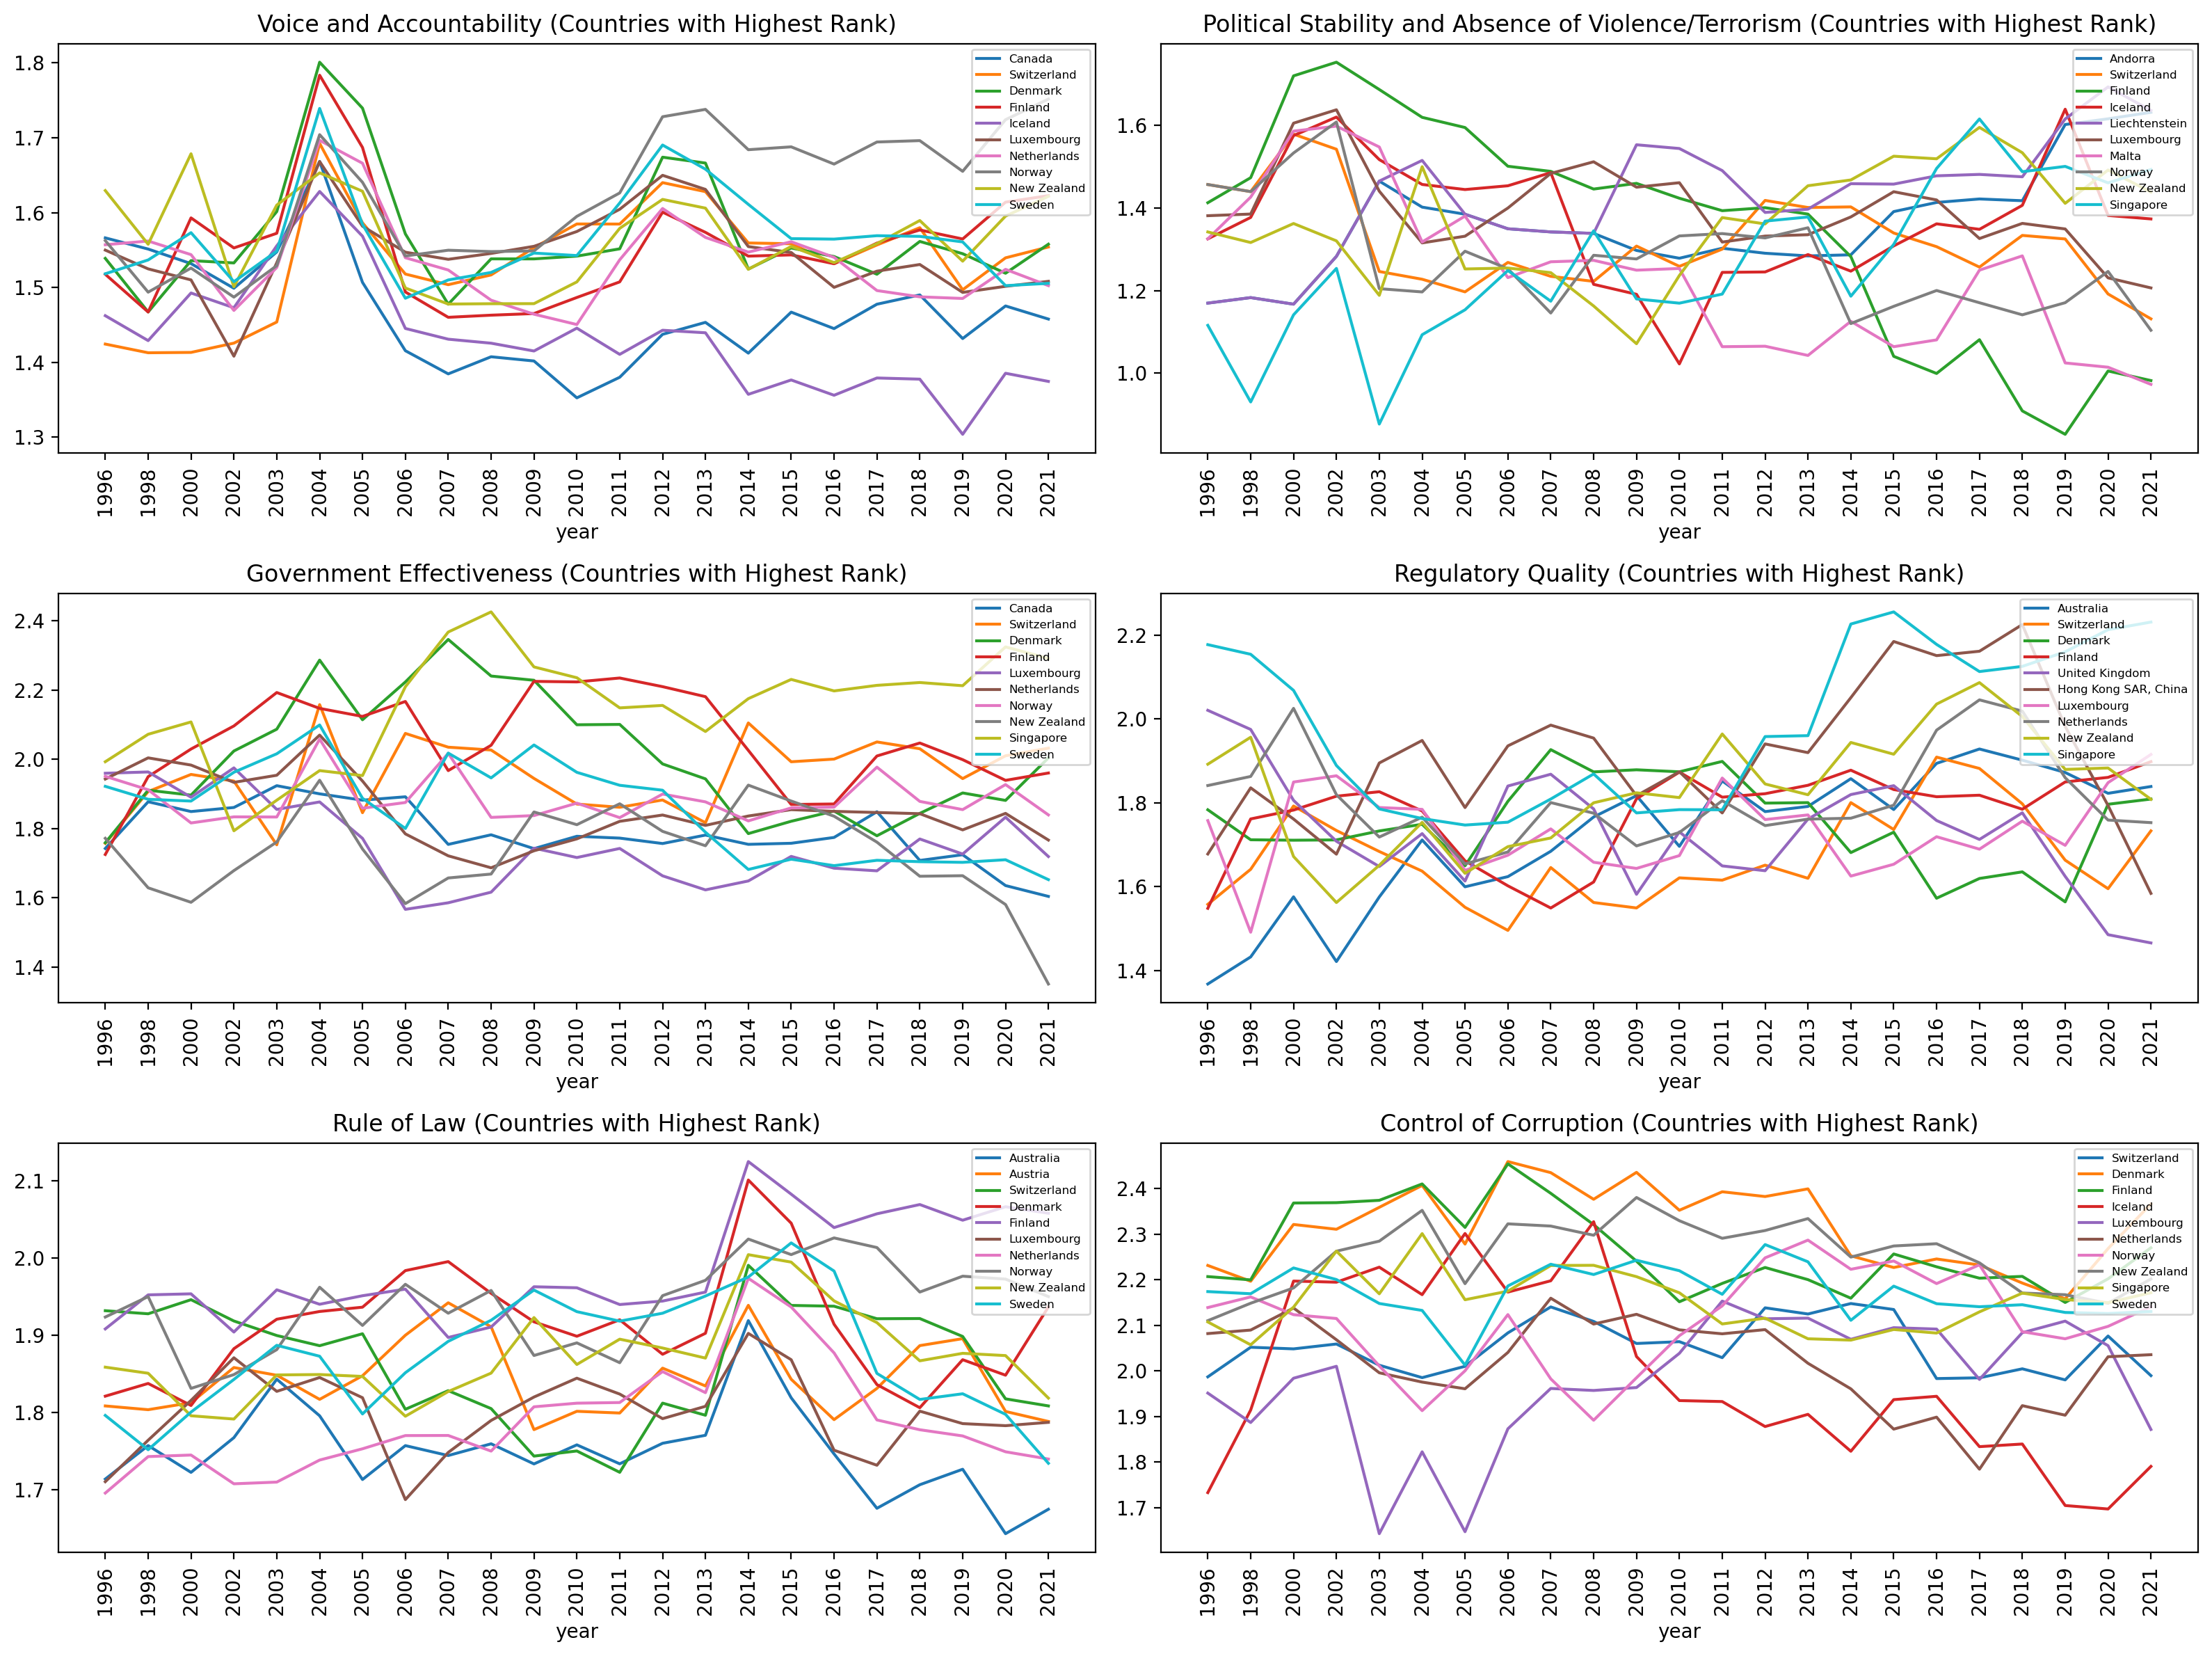

In [8]:
plt.figure(figsize=(16, 12), dpi=200)
for i, indicator in enumerate(indicators):
    highest_ranking_countries = list(governance_df[governance_df["gov_indicator"] == indicator].groupby("country")["gov_estimate"].sum().sort_values(ascending=False).reset_index().iloc[:10, 0])
    plt.subplot(3, 2, i+1)
    sns.lineplot(data=governance_df[(governance_df["country"].isin(highest_ranking_countries)) & (governance_df["gov_indicator"] == indicator)].reset_index(drop=True),
                 x="year",
                 y="gov_estimate",
                 hue="country")
    plt.title(f"{indicator_names[indicator]} (Countries with Highest Rank)")
    plt.xticks(rotation=90)
    plt.ylabel("")
    plt.legend(fontsize=6, loc="upper right")
    
plt.tight_layout()
plt.show()

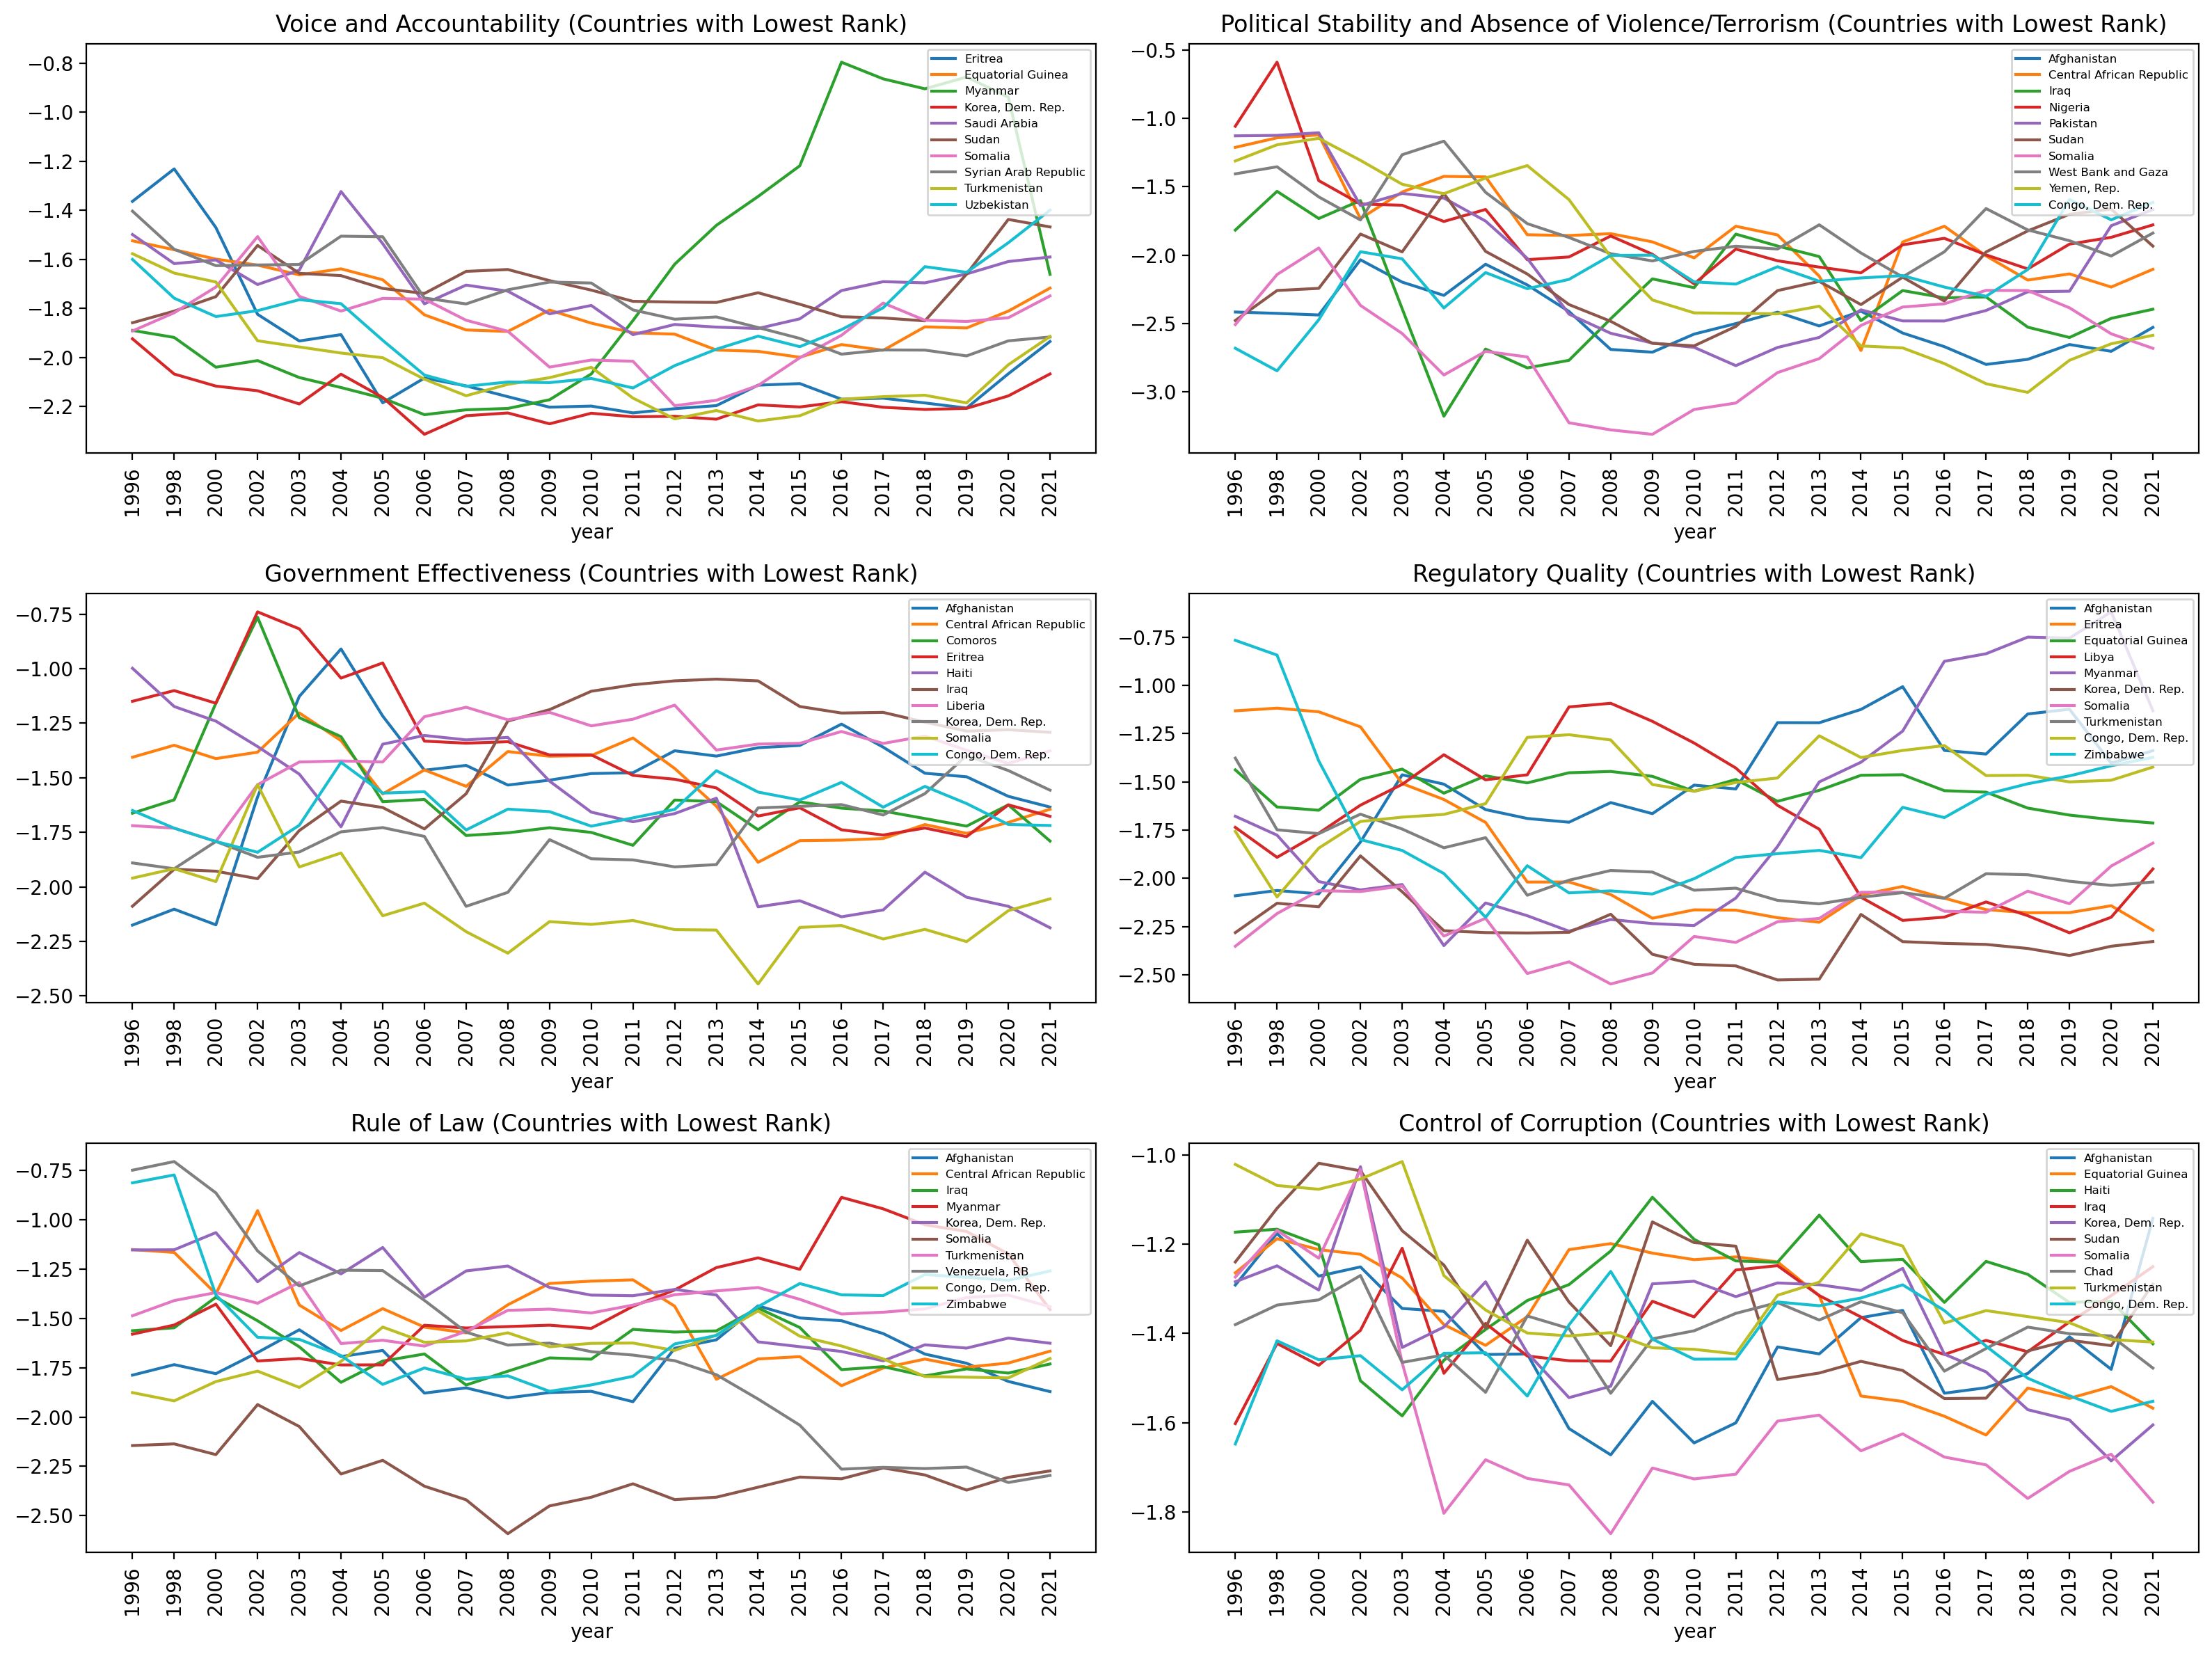

In [9]:
plt.figure(figsize=(16, 12), dpi=200)
for i, indicator in enumerate(indicators):
    lowest_ranking_countries = list(governance_df[governance_df["gov_indicator"] == indicator].groupby("country")["gov_estimate"].sum().sort_values(ascending=False).reset_index().iloc[-10:, 0])
    plt.subplot(3, 2, i+1)
    sns.lineplot(data=governance_df[(governance_df["country"].isin(lowest_ranking_countries)) & (governance_df["gov_indicator"] == indicator)].reset_index(drop=True),
                 x="year",
                 y="gov_estimate",
                 hue="country")
    plt.title(f"{indicator_names[indicator]} (Countries with Lowest Rank)")
    plt.xticks(rotation=90)
    plt.ylabel("")
    plt.legend(fontsize=6, loc="upper right")
    
plt.tight_layout()
plt.show()

## Human Development Index (HDI)

- Columns (Source: https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_metadata.xlsx):
    - **iso3**: ISO3 (three-letter country codes defined in ISO 3166-1)
    - **country**: HDR (Human Development Reports) Country Name
    - **hdicode**: Human Development Groups
    - **region**: UNDP Developing Regions
    - **hdi**: Human Development Index (value)
    - **rank**: HDI Rank (2021)

### Read and Clean Dataset

In [10]:
hdi = pd.read_csv("data/HDR21-22_Composite_indices_complete_time_series.csv")
hdi = hdi.rename({"hdi_rank_2021":"rank"}, axis=1)

In [11]:
# Select only columns with iso3, country name, hdicode, region, rank, and HDI values
hdi = pd.concat([hdi[["iso3", "country", "hdicode", "region", "rank"]], hdi.iloc[:, 5:37]], axis=1)
display(hdi.head())

iso3               country    hdicode region   rank  hdi_1990  hdi_1991  \
0  AFG           Afghanistan        Low     SA  180.0     0.273     0.279   
1  AGO                Angola     Medium    SSA  148.0       NaN       NaN   
2  ALB               Albania       High    ECA   67.0     0.647     0.629   
3  AND               Andorra  Very High    NaN   40.0       NaN       NaN   
4  ARE  United Arab Emirates  Very High     AS   26.0     0.728     0.739   

   hdi_1992  hdi_1993  hdi_1994  ...  hdi_2012  hdi_2013  hdi_2014  hdi_2015  \
0     0.287     0.297     0.292  ...     0.466     0.474     0.479     0.478   
1       NaN       NaN       NaN  ...     0.541     0.552     0.563     0.582   
2     0.614     0.617     0.624  ...     0.778     0.785     0.792     0.795   
3       NaN       NaN       NaN  ...     0.869     0.864     0.871     0.867   
4     0.742     0.748     0.755  ...     0.846     0.852     0.859     0.865   

   hdi_2016  hdi_2017  hdi_2018  hdi_2019  hdi_2020  hdi_2021  
0     0.481     0.482     0.483     0.488     0.483     0.478  
1     0.596     0.597     0.595     0.595     0.590     0.586  
2     0.798     0.802     0.806     0.810     0.794     0.796  
3     0.871     0.868     0.872     0.873     0.848     0.858  
4     0.870     0.897     0.909     0.920     0.912     0.911  

[5 rows x 37 columns]

In [12]:
# Replace column names with "hdi_{year}" to "{year}"
col_replace = {col:col.split("_")[1] for col in hdi.columns if "_" in col}
hdi = hdi.rename(col_replace, axis=1)
display(hdi.head())

iso3               country    hdicode region   rank   1990   1991   1992  \
0  AFG           Afghanistan        Low     SA  180.0  0.273  0.279  0.287   
1  AGO                Angola     Medium    SSA  148.0    NaN    NaN    NaN   
2  ALB               Albania       High    ECA   67.0  0.647  0.629  0.614   
3  AND               Andorra  Very High    NaN   40.0    NaN    NaN    NaN   
4  ARE  United Arab Emirates  Very High     AS   26.0  0.728  0.739  0.742   

    1993   1994  ...   2012   2013   2014   2015   2016   2017   2018   2019  \
0  0.297  0.292  ...  0.466  0.474  0.479  0.478  0.481  0.482  0.483  0.488   
1    NaN    NaN  ...  0.541  0.552  0.563  0.582  0.596  0.597  0.595  0.595   
2  0.617  0.624  ...  0.778  0.785  0.792  0.795  0.798  0.802  0.806  0.810   
3    NaN    NaN  ...  0.869  0.864  0.871  0.867  0.871  0.868  0.872  0.873   
4  0.748  0.755  ...  0.846  0.852  0.859  0.865  0.870  0.897  0.909  0.920   

    2020   2021  
0  0.483  0.478  
1  0.590  0.586  
2  0.794  0.796  
3  0.848  0.858  
4  0.912  0.911  

[5 rows x 37 columns]

In [13]:
# Drop rows where all HDI values are NaN
hdi = hdi.drop([i for i in range(len(hdi)) if sum(hdi.iloc[i, 5:].isna()) == hdi.iloc[i, 5:].shape[0]]).reset_index(drop=True)

In [14]:
# Fill NaN values with row-wise interpolation
hdi = pd.concat([hdi.iloc[:, :5], hdi.iloc[:, 5:].interpolate(axis=1)], axis=1)

In [15]:
# Drop rows where "country" indicates continents or larger regions
hdi = hdi[~hdi["iso3"].apply(lambda iso3: "." in iso3)].reset_index(drop=True)
hdi["rank"] = hdi["rank"].astype("int64")

### Exploratory Analysis

In [16]:
hdi_df = pd.DataFrame()

for i in range(len(hdi)):
    iso3 = hdi.loc[i, "iso3"]
    country = hdi.loc[i, "country"]
    hdicode = hdi.loc[i, "hdicode"]
    region = hdi.loc[i, "region"]
    rank = hdi.loc[i, "rank"]
    
    df = hdi[hdi["iso3"] == iso3].T.reset_index().iloc[5:].rename({"index":"year", i:"hdi"}, axis=1).reset_index(drop=True)
    df["iso3"] = iso3
    df["country"] = country
    df["hdicode"] = hdicode
    df["region"] = region
    df["rank"] = rank
    
    hdi_df = pd.concat([hdi_df, df]).reset_index(drop=True)

In [17]:
# 10 countries with the highest HDI rank in 2021
top_hdi = hdi_df[hdi_df["rank"] <= 10].reset_index(drop=True)

# 10 countries with the lowest HDI rank in 2021
bottom_hdi = hdi_df[hdi_df["rank"].isin(sorted(hdi_df["rank"].unique())[-10:])].reset_index(drop=True)

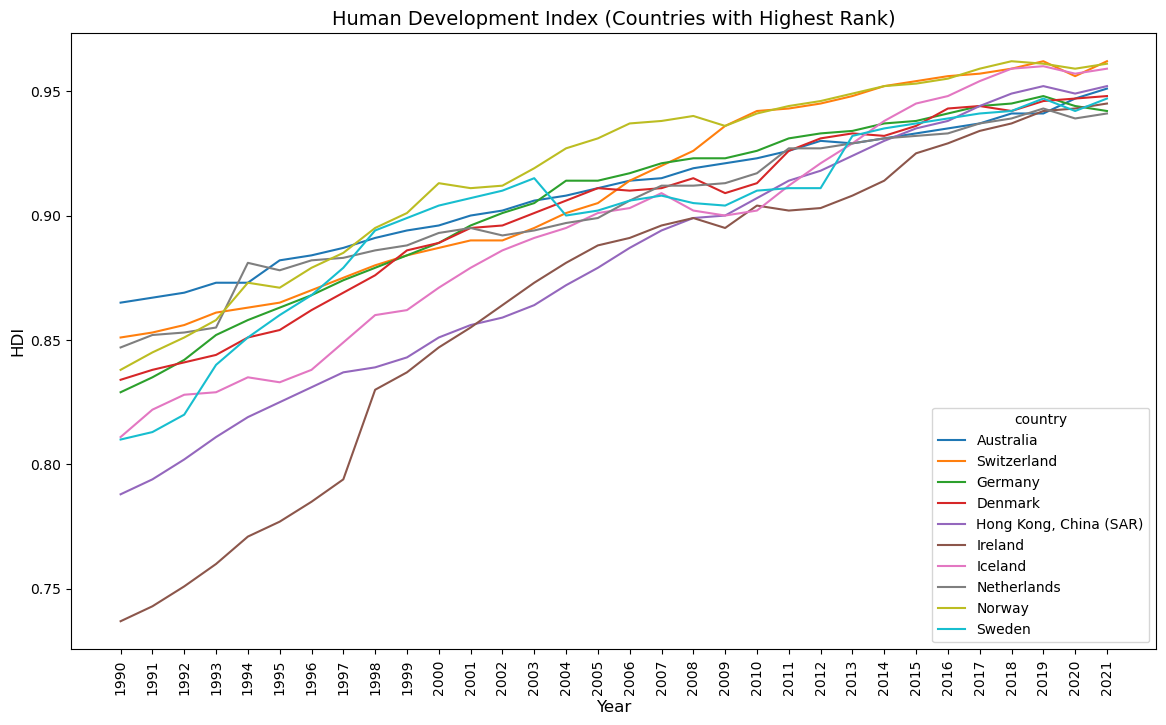

In [18]:
plt.figure(figsize=(14, 8), dpi=100)
sns.lineplot(data=top_hdi, x="year", y="hdi", hue="country")
plt.xticks(rotation=90)
plt.title("Human Development Index (Countries with Highest Rank)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("HDI", fontsize=12)
plt.show()

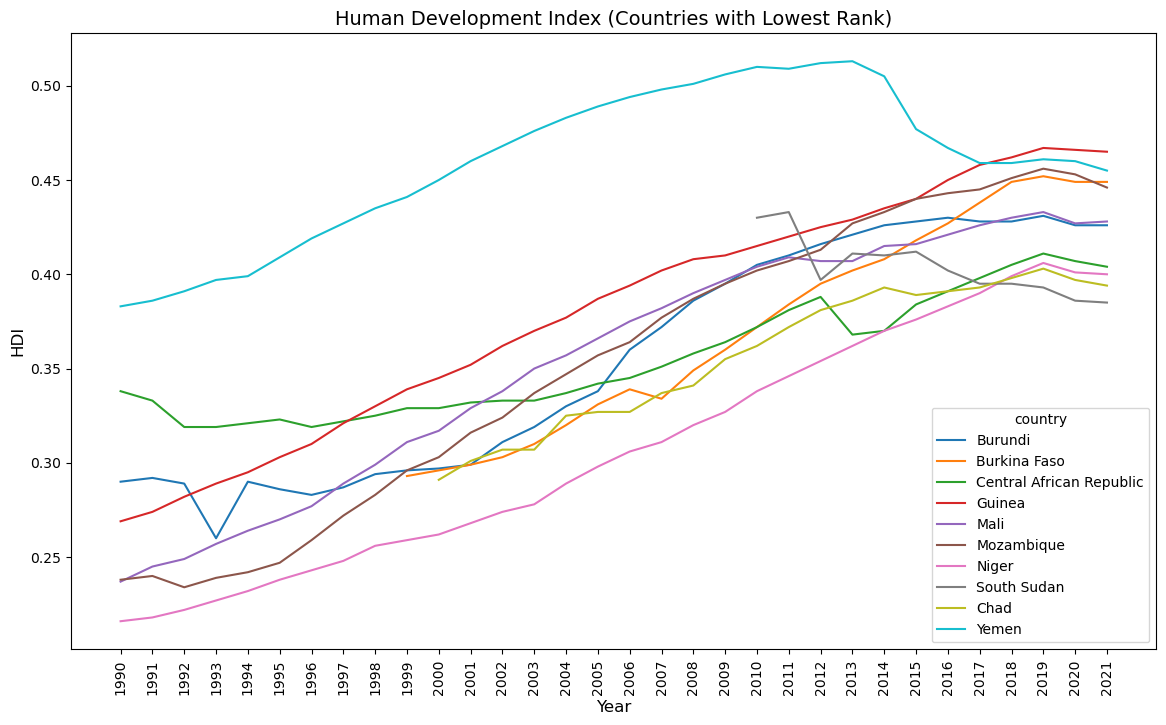

In [19]:
plt.figure(figsize=(14, 8), dpi=100)
sns.lineplot(data=bottom_hdi, x="year", y="hdi", hue="country")
plt.xticks(rotation=90)
plt.title("Human Development Index (Countries with Lowest Rank)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("HDI", fontsize=12)
plt.show()

## Merge WGI & HDI Datasets

In [20]:
hdi_df = hdi_df.rename({"iso3":"code"}, axis=1)

In [21]:
common_country_codes = sorted(set(hdi_df["code"]).intersection(governance_df["code"]))

In [22]:
df_merge = pd.merge(governance_df[governance_df["code"].isin(common_country_codes)].reset_index(drop=True),
              hdi_df[hdi_df["code"].isin(common_country_codes)].reset_index(drop=True),
              on=["code", "year"], how="outer")
df_merge = df_merge.rename({"country_y": "country"}, axis=1).drop("country_x", axis=1)[["code", "country", "year",
                                                                            "gov_indicator", "gov_estimate", "hdi", "hdicode",
                                                                            "region", "rank"]]
df_merge[["gov_estimate", "hdi"]] = df_merge[["gov_estimate", "hdi"]].astype(float)

# Drop rows where "gov_estimate" or "hdi" is NA
df_merge = df_merge.dropna(subset=["gov_estimate", "hdi"]).reset_index(drop=True)
df_merge.head()

code      country  year                  gov_indicator  gov_estimate    hdi  \
0  AFG  Afghanistan  1996         VoiceandAccountability     -1.908540  0.319   
1  AFG  Afghanistan  1996  Political StabilityNoViolence     -2.417310  0.319   
2  AFG  Afghanistan  1996        GovernmentEffectiveness     -2.175167  0.319   
3  AFG  Afghanistan  1996              RegulatoryQuality     -2.090330  0.319   
4  AFG  Afghanistan  1996                      RuleofLaw     -1.788075  0.319   

  hdicode region  rank  
0     Low     SA   180  
1     Low     SA   180  
2     Low     SA   180  
3     Low     SA   180  
4     Low     SA   180

In [23]:
df = df_merge.drop_duplicates(subset=["code", "country", "year", "hdi"])[["code", "country", "year", "hdi"]].reset_index(drop=True)

for indicator in indicators:
    estimates = []
    for i in range(len(df)):
        code = df.loc[i, "code"]
        year = df.loc[i, "year"]
        try:
            estimates.append(df_merge[(df_merge["code"] == code) & (df_merge["year"] == year) & (df_merge["gov_indicator"] == indicator)]["gov_estimate"].values[0])
        except IndexError:
            estimates.append(np.nan)
    df[indicator] = estimates
    
df = df.dropna(axis=0).reset_index(drop=True)
df.head()

code      country  year    hdi  VoiceandAccountability  \
0  AFG  Afghanistan  1996  0.319               -1.908540   
1  AFG  Afghanistan  1998  0.324               -2.039301   
2  AFG  Afghanistan  2000  0.335               -2.031417   
3  AFG  Afghanistan  2002  0.362               -1.433421   
4  AFG  Afghanistan  2003  0.376               -1.177571   

   Political StabilityNoViolence  GovernmentEffectiveness  RegulatoryQuality  \
0                      -2.417310                -2.175167          -2.090330   
1                      -2.427355                -2.102292          -2.062872   
2                      -2.438969                -2.173946          -2.080253   
3                      -2.035034                -1.587687          -1.811546   
4                      -2.198372                -1.127420          -1.463108   

   RuleofLaw  ControlofCorruption  
0  -1.788075            -1.291705  
1  -1.734887            -1.176012  
2  -1.780661            -1.271724  
3  -1.673473            -1.251137  
4  -1.558294            -1.344180

## Correlation Matrix

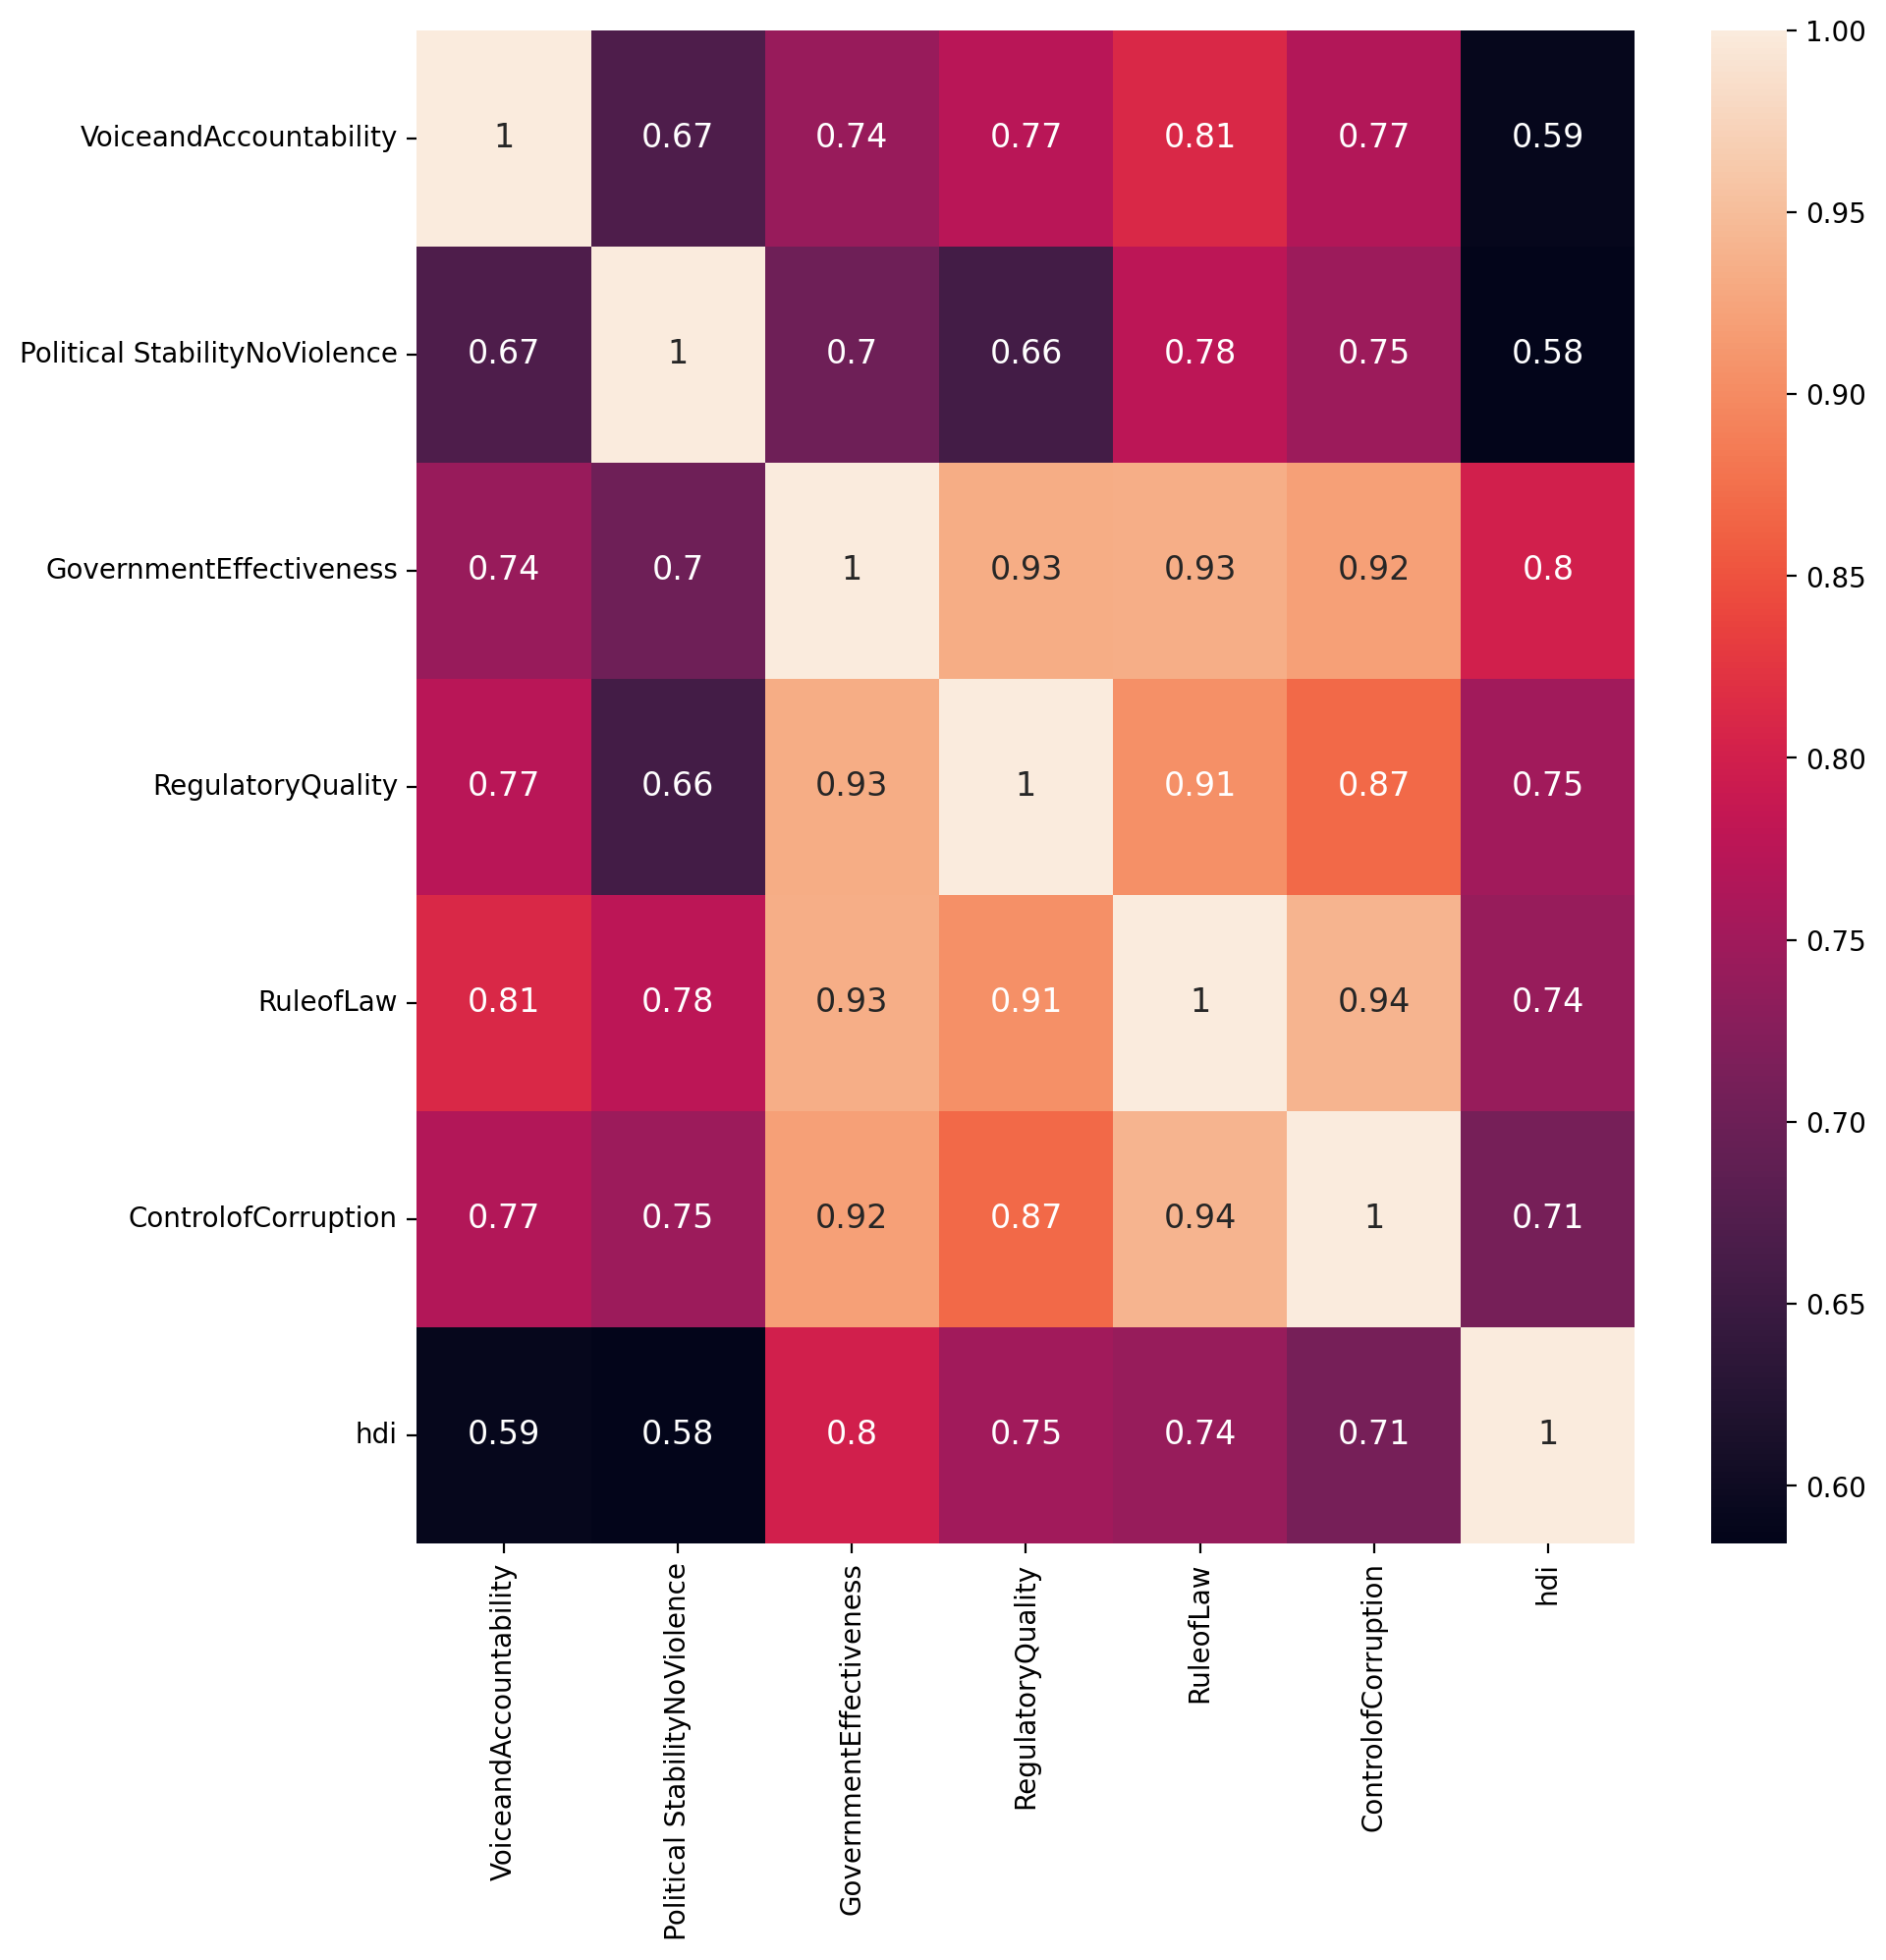

In [24]:
plt.figure(figsize=(10, 10), dpi=200)
sns.heatmap(df[indicators + ["hdi"]].corr(), annot=True, annot_kws={"size": 12})
plt.show()

## Simple Linear Regression Analysis (One-Variable)

In [25]:
df_indicator = {}

for indicator in indicators:
    df_indicator[indicator] = df[["code", "country", "year", "hdi", indicator]].reset_index(drop=True)

In [26]:
ols_results = {}
mse_scores = {}

for indicator in indicators:
    X = df_indicator[indicator][indicator]
    y = df_indicator[indicator]["hdi"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    model = sm.OLS(y_train, X_train)
    result = model.fit()
    y_hat = result.predict(X_test)
    ols_results[indicator] = result.summary()
    mse_scores[indicator] = mean_squared_error(y_test, y_hat)

In [27]:
for indicator in indicators:
    print(f"\n- {indicator_names[indicator]} (Mean Squared Error: {mse_scores[indicator]:.3f})")
    display(ols_results[indicator])


- Voice and Accountability (Mean Squared Error: 0.017)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hdi   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     1533.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          7.43e-269
Time:                        13:33:06   Log-Likelihood:                 1776.7
No. Observations:                2858   AIC:                            -3549.
Df Residuals:                    2856   BIC:                            -3538.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.6900      0.002    283.457      0.000       0.685       0.695
VoiceandAccountability     0.0973      0.002     39.159      0.000       0.092       0.102
==============================================================================
Omnibus:                       39.146   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.309
Skew:                          -0.269   Prob(JB):                     2.91e-09
Kurtosis:                       2.800   Cond. No.                         1.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


- Political Stability and Absence of Violence/Terrorism (Mean Squared Error: 0.017)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hdi   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1464.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          5.25e-259
Time:                        13:33:06   Log-Likelihood:                 1754.1
No. Observations:                2858   AIC:                            -3504.
Df Residuals:                    2856   BIC:                            -3492.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.6920      0.002    281.695      0.000       0.687       0.697
Political StabilityNoViolence     0.0971      0.003     38.266      0.000       0.092       0.102
==============================================================================
Omnibus:                       95.220   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.915
Skew:                          -0.449   Prob(JB):                     7.40e-23
Kurtosis:                       2.781   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


- Government Effectiveness (Mean Squared Error: 0.009)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hdi   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     5055.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:33:06   Log-Likelihood:                 2618.6
No. Observations:                2858   AIC:                            -5233.
Df Residuals:                    2856   BIC:                            -5221.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.6899      0.002    380.679      0.000       0.686       0.693
GovernmentEffectiveness     0.1319      0.002     71.101      0.000       0.128       0.136
==============================================================================
Omnibus:                       77.000   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.039
Skew:                          -0.399   Prob(JB):                     9.30e-19
Kurtosis:                       3.245   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


- Regulatory Quality (Mean Squared Error: 0.011)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hdi   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     3660.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:33:06   Log-Likelihood:                 2341.3
No. Observations:                2858   AIC:                            -4679.
Df Residuals:                    2856   BIC:                            -4667.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6893      0.002    345.228      0.000       0.685       0.693
RegulatoryQuality     0.1250      0.002     60.497      0.000       0.121       0.129
==============================================================================
Omnibus:                       56.998   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.924
Skew:                          -0.221   Prob(JB):                     1.62e-18
Kurtosis:                       3.701   Cond. No.                         1.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


- Rule of Law (Mean Squared Error: 0.012)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hdi   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     3436.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:33:06   Log-Likelihood:                 2291.3
No. Observations:                2858   AIC:                            -4579.
Df Residuals:                    2856   BIC:                            -4567.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6927      0.002    340.461      0.000       0.689       0.697
RuleofLaw      0.1217      0.002     58.619      0.000       0.118       0.126
==============================================================================
Omnibus:                       76.423   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.986
Skew:                          -0.406   Prob(JB):                     1.57e-18
Kurtosis:                       3.169   Cond. No.                         1.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


- Control of Corruption (Mean Squared Error: 0.013)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hdi   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     2905.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:33:06   Log-Likelihood:                 2165.2
No. Observations:                2858   AIC:                            -4326.
Df Residuals:                    2856   BIC:                            -4315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6908      0.002    325.133      0.000       0.687       0.695
ControlofCorruption     0.1146      0.002     53.896      0.000       0.110       0.119
==============================================================================
Omnibus:                       93.829   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.037
Skew:                          -0.444   Prob(JB):                     1.89e-22
Kurtosis:                       2.775   Cond. No.                         1.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression Analysis

In [28]:
X = df[indicators]
y = df["hdi"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train)
result = model.fit()
y_hat = result.predict(X_test)

In [29]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_hat):.3f}")

Mean Squared Error: 0.009


In [30]:
display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hdi   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     871.5
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:33:06   Log-Likelihood:                 2651.2
No. Observations:                2858   AIC:                            -5288.
Df Residuals:                    2851   BIC:                            -5247.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.6899      0.002    383.301      0.000       0.686       0.693
VoiceandAccountability           -0.0006      0.003     -0.186      0.853      -0.007       0.006
Political StabilityNoViolence     0.0156      0.003      5.092      0.000       0.010       0.022
GovernmentEffectiveness           0.1496      0.007     21.906      0.000       0.136       0.163
RegulatoryQuality                 0.0097      0.006      1.723      0.085      -0.001       0.021
RuleofLaw                        -0.0034      0.007     -0.469      0.639      -0.018       0.011
ControlofCorruption              -0.0358      0.006     -6.374      0.000      -0.047      -0.025
==============================================================================
Omnibus:                       84.614   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.527
Skew:                          -0.393   Prob(JB):                     1.81e-21
Kurtosis:                       3.430   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""